In [ ]:
import pandas as pd

In [ ]:
import numpy as np

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#récupérer les tweets brut
data_brut= '/content/drive/MyDrive/Data_M/bertsom25_cluster_14_raw_msg.txt'
with open(data_brut, "r") as file:
    lines_brut = file.readlines()

In [ ]:
# transformer en dataframe
data = pd.DataFrame(lines_brut, columns = ['tweet'])

In [ ]:
data.head(20)

,tweet
0,Sale noir vas\n
1,Ya quoi sale noir\n
2,Jsui mort\n
3,Bah le babouin\n
4,je préfère banania\n
5,Negre de maison\n
6,c toi sale noir\n
7,Nègre brésilien triangulaire\n
8,J’ai menti ?\n
9,oh ptn sale noir\n


In [ ]:
vec= np.load('/content/drive/MyDrive/Data_M/cluster_14_encoded.npy')

In [ ]:
vec.shape

(97, 768)

In [ ]:
%%time
from sklearn.ensemble import IsolationForest
# definir le modèle ainsi que ses paramètres
clf=IsolationForest(n_estimators=100, max_samples='auto', \
                        max_features=1.0, bootstrap=False, n_jobs=-1, random_state=42, verbose=0, contamination=0.1)
# Entrainer le modèle
clf.fit(vec)

CPU times: user 806 ms, sys: 194 ms, total: 1e+03 ms
Wall time: 1.59 s


In [ ]:
%%time
# faire des prédictions sur nos données
pred = clf.predict(vec)

CPU times: user 81.9 ms, sys: 0 ns, total: 81.9 ms
Wall time: 84.6 ms


In [ ]:
# rajouter une colonne dans le dataframe
data['pred']= pred

In [ ]:
#localiser les outliers dans le dataframe
outliers=data['tweet'].loc[data['pred']==-1]
outlier_index=list(outliers.index)
data['pred'].value_counts()

 1    87
-1    10
Name: pred, dtype: int64

In [ ]:
outliers.head(20)

11               macaque de merde dégage de là putain\n
18                                     Métèque et mat\n
21                                    Bonne journée !\n
33                                            Touché.\n
37      L’entree de macaque de luis diaz 🤦‍♂️ #VILLIV\n
40                   VIVE LE SPORT SA MÈRE LA BABOUIN\n
59    l'origine de la personne mais sa fonction dans...
76         Belhanda macaque de compétition on kiffe 😈\n
79                                   Culotté le nègre\n
89                                    Congoïde rigolo\n
Name: tweet, dtype: object

In [ ]:
data.head(20)

,tweet,pred
0,Sale noir vas\n,1
1,Ya quoi sale noir\n,1
2,Jsui mort\n,1
3,Bah le babouin\n,1
4,je préfère banania\n,1
5,Negre de maison\n,1
6,c toi sale noir\n,1
7,Nègre brésilien triangulaire\n,1
8,J’ai menti ?\n,1
9,oh ptn sale noir\n,1


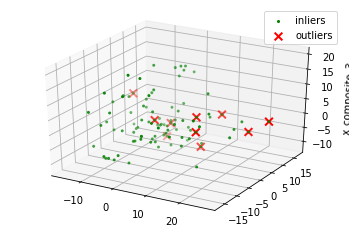

CPU times: user 231 ms, sys: 267 ms, total: 498 ms
Wall time: 310 ms


In [ ]:
# Visulaliser les outliers 3 dimensions
%%time
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from mpl_toolkits.mplot3d import Axes3D
pca = PCA(n_components=3)  # Reduce to k=3 dimensions
scaler = StandardScaler()
#normalize the metrics
X = scaler.fit_transform(vec)
X_reduce = pca.fit_transform(X)

fig = plt.figure()
figsize=(12, 12,12)
ax = fig.add_subplot(111, projection='3d')
ax.set_zlabel("x_composite_3")

# Plot the compressed data points
ax.scatter(X_reduce[:, 0], X_reduce[:, 1], zs=X_reduce[:, 2], s=4, lw=1, label="inliers",c="green")

# Plot x's for the ground truth outliers
ax.scatter(X_reduce[outlier_index,0],X_reduce[outlier_index,1], X_reduce[outlier_index,2],
           lw=2, s=60, marker="x", c="red", label="outliers")
ax.legend()
plt.show()

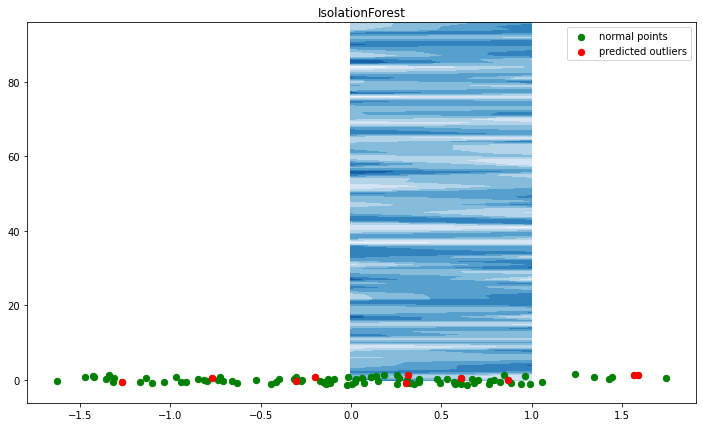

CPU times: user 272 ms, sys: 157 ms, total: 429 ms
Wall time: 303 ms


In [ ]:
# Visulaliser les outliers 2 dimensions
%%time
pca = PCA(2)
pca.fit(vec)


res=pd.DataFrame(pca.transform(vec))

Z = np.array(res)
figsize=(12, 7)
plt.figure(figsize=figsize)
plt.title("IsolationForest")
plt.contourf( Z, cmap=plt.cm.Blues_r)

b1 = plt.scatter(res[0], res[1], c='green',
                 s=40,label="normal points")

b1 = plt.scatter(res.iloc[outlier_index,0],res.iloc[outlier_index,1], c='red',
                 s=40,  edgecolor="red",label="predicted outliers")
plt.legend(loc="upper right")
plt.show()

On remarque que les outliers sont des tweets  contenant les mots dollars , des mots en coréen

In [ ]:
with open("outliers.txt", 'w') as f:
  for line in outliers:
    f.write(line)